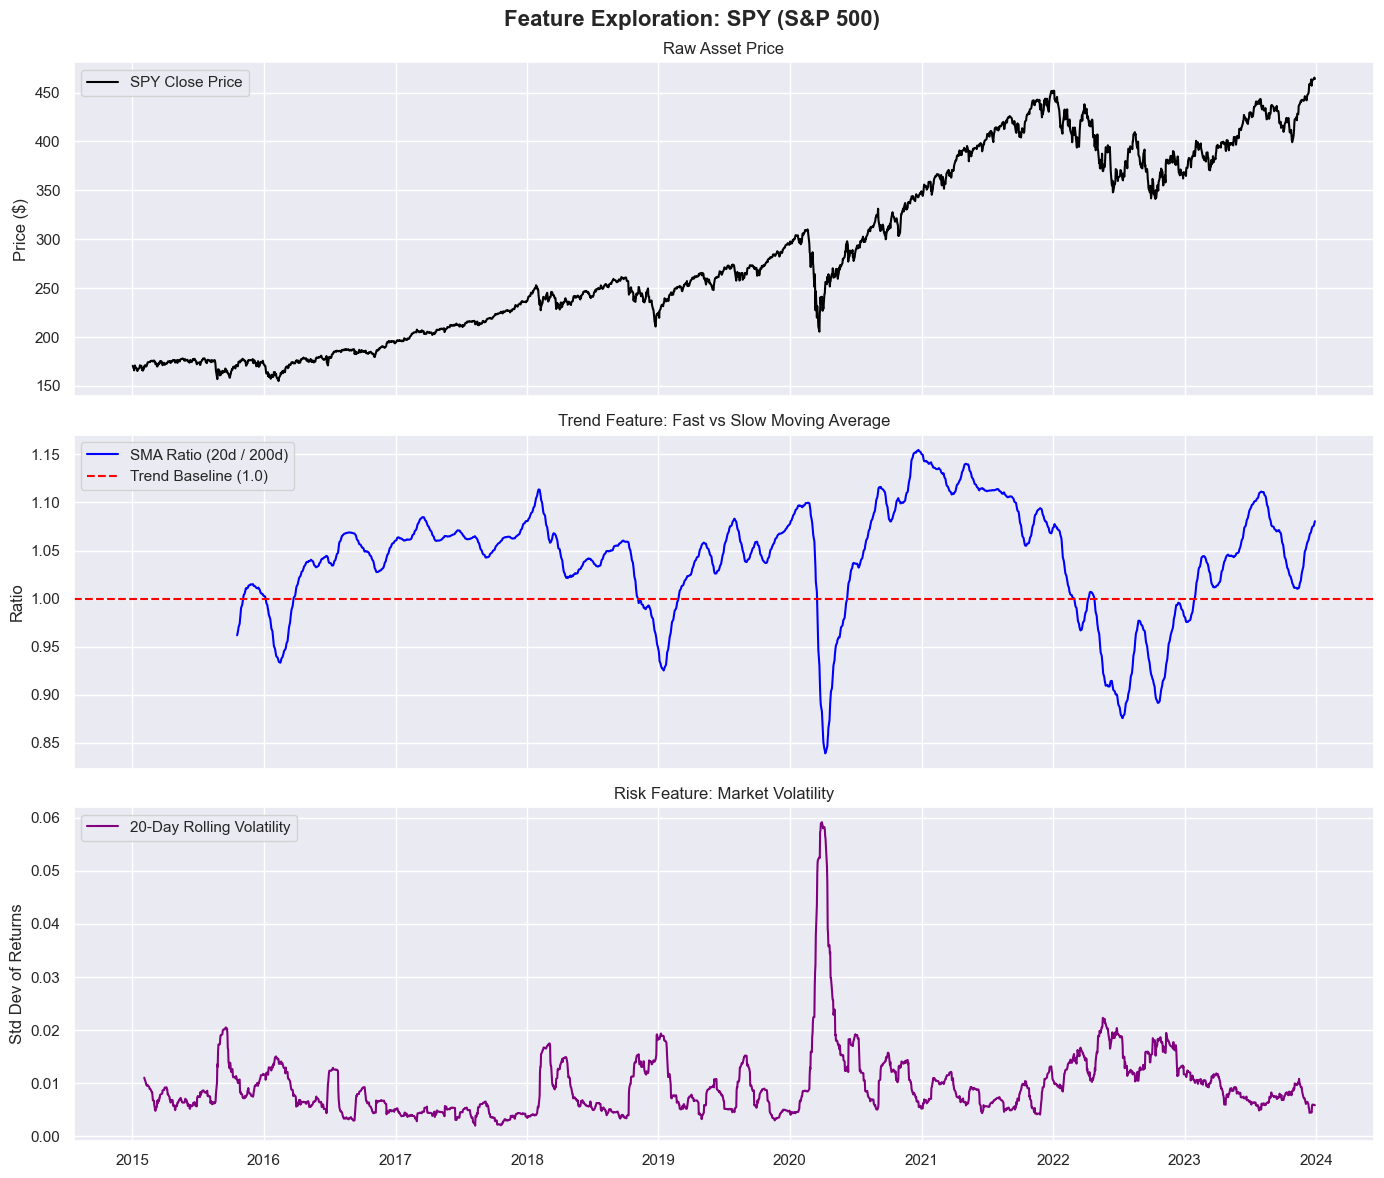

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# 1. Load your newly generated features dataset
df = pd.read_parquet("../data/features/universe_features.parquet")

# 2. Isolate SPY and set the Date as the index for easy plotting
spy = df[df['Ticker'] == 'SPY'].set_index('Date')

# 3. Create a multi-panel dashboard
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle('Feature Exploration: SPY (S&P 500)', fontsize=16, fontweight='bold')

# --- Panel 1: The Price ---
axes[0].plot(spy.index, spy['Close'], color='black', label='SPY Close Price')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Raw Asset Price')
axes[0].legend(loc='upper left')

# --- Panel 2: The Trend Feature (SMA Ratio) ---
# A value > 1.0 means the short-term trend is higher than the long-term trend (Bullish)
axes[1].plot(spy.index, spy['sma_ratio_20_200'], color='blue', label='SMA Ratio (20d / 200d)')
axes[1].axhline(1.0, color='red', linestyle='--', label='Trend Baseline (1.0)')
axes[1].set_ylabel('Ratio')
axes[1].set_title('Trend Feature: Fast vs Slow Moving Average')
axes[1].legend(loc='upper left')

# --- Panel 3: Rolling Volatility ---
axes[2].plot(spy.index, spy['volatility_20d'], color='purple', label='20-Day Rolling Volatility')
axes[2].set_ylabel('Std Dev of Returns')
axes[2].set_title('Risk Feature: Market Volatility')
axes[2].legend(loc='upper left')

plt.tight_layout()
plt.show()

In [2]:
print(spy[['Close', 'return_1d', 'volatility_20d', 'sma_ratio_20_200']].head(25))

                 Close  return_1d  volatility_20d  sma_ratio_20_200
Date                                                               
2015-01-02  170.589569        NaN             NaN               NaN
2015-01-05  167.508850        NaN             NaN               NaN
2015-01-06  165.931107  -0.018224             NaN               NaN
2015-01-07  167.998810  -0.009464             NaN               NaN
2015-01-08  170.979904   0.012384             NaN               NaN
2015-01-09  169.609741   0.017589             NaN               NaN
2015-01-12  168.281067  -0.008046             NaN               NaN
2015-01-13  167.807785  -0.007865             NaN               NaN
2015-01-14  166.794708  -0.002816             NaN               NaN
2015-01-15  165.266769  -0.006055             NaN               NaN
2015-01-16  167.434097  -0.009203             NaN               NaN
2015-01-20  167.791168   0.013029             NaN               NaN
2015-01-21  168.638184   0.002130             Na